In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
df=pd.read_csv("Temperaturas.zip",index_col=0)
print(df.shape)
df.head()

(1654803, 3)


,sensor,fecha,temperatura
id,,,
2,sala,2020-03-31 14:38:14,23.80
3,oficina,2020-03-31 14:43:40,27.20
4,piscina,2020-03-31 14:46:26,27.62
5,sala,2020-03-31 14:48:14,25.40
6,oficina,2020-03-31 14:53:40,28.80


In [196]:
ndf=df[df["sensor"]=='piscina']
ndf.head()

,sensor,fecha,temperatura
id,,,
4,piscina,2020-03-31 14:46:26,27.62
7,piscina,2020-03-31 14:56:32,27.56
10,piscina,2020-03-31 15:06:37,27.62
13,piscina,2020-03-31 15:16:42,27.62
16,piscina,2020-03-31 15:26:47,27.62


In [197]:
ndf.dtypes

sensor          object
fecha           object
temperatura    float64
dtype: object

In [198]:

ndf.drop(['sensor'], axis=1, inplace=True)
ndf

/tmp/ipykernel_49649/3541695892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(['sensor'], axis=1, inplace=True)


,fecha,temperatura
id,,
4,2020-03-31 14:46:26,27.62
7,2020-03-31 14:56:32,27.56
10,2020-03-31 15:06:37,27.62
13,2020-03-31 15:16:42,27.62
16,2020-03-31 15:26:47,27.62
...,...,...
1656995,2022-09-29 15:10:46,29.06
1656997,2022-09-29 15:11:46,29.06
1656998,2022-09-29 15:12:46,29.12


In [199]:
ndf.shape

(1221176, 2)

In [200]:
datetime_index = pd.DatetimeIndex(ndf.fecha.values)

df2=ndf.set_index(datetime_index)

In [201]:
df2.drop('fecha', axis=1, inplace=True)


In [202]:
df2.head()

,temperatura
2020-03-31 14:46:26,27.62
2020-03-31 14:56:32,27.56
2020-03-31 15:06:37,27.62
2020-03-31 15:16:42,27.62
2020-03-31 15:26:47,27.62


In [203]:
df_group = df2.groupby(pd.Grouper( freq='1440T'))['temperatura'].agg('mean')   
df_group.dropna(inplace=True)
df_group = df_group.to_frame().reset_index()

In [204]:
df_group.head()

,index,temperatura
0,2020-03-31,27.568519
1,2020-04-01,27.482057
2,2020-04-02,27.811119
3,2020-04-03,27.862657
4,2020-04-04,27.817254


In [205]:
df_group_min=df_group[df_group.temperatura>22]
df_group=df_group_min[df_group_min.temperatura<32]
df_group


,index,temperatura
0,2020-03-31,27.568519
1,2020-04-01,27.482057
2,2020-04-02,27.811119
3,2020-04-03,27.862657
4,2020-04-04,27.817254
...,...,...
876,2022-09-25,29.570606
877,2022-09-26,29.631149
878,2022-09-27,29.534262
879,2022-09-28,29.411929


In [206]:
#df_group.drop(df_group.index[750:820], inplace=True)

In [207]:
df_group.shape

(838, 2)

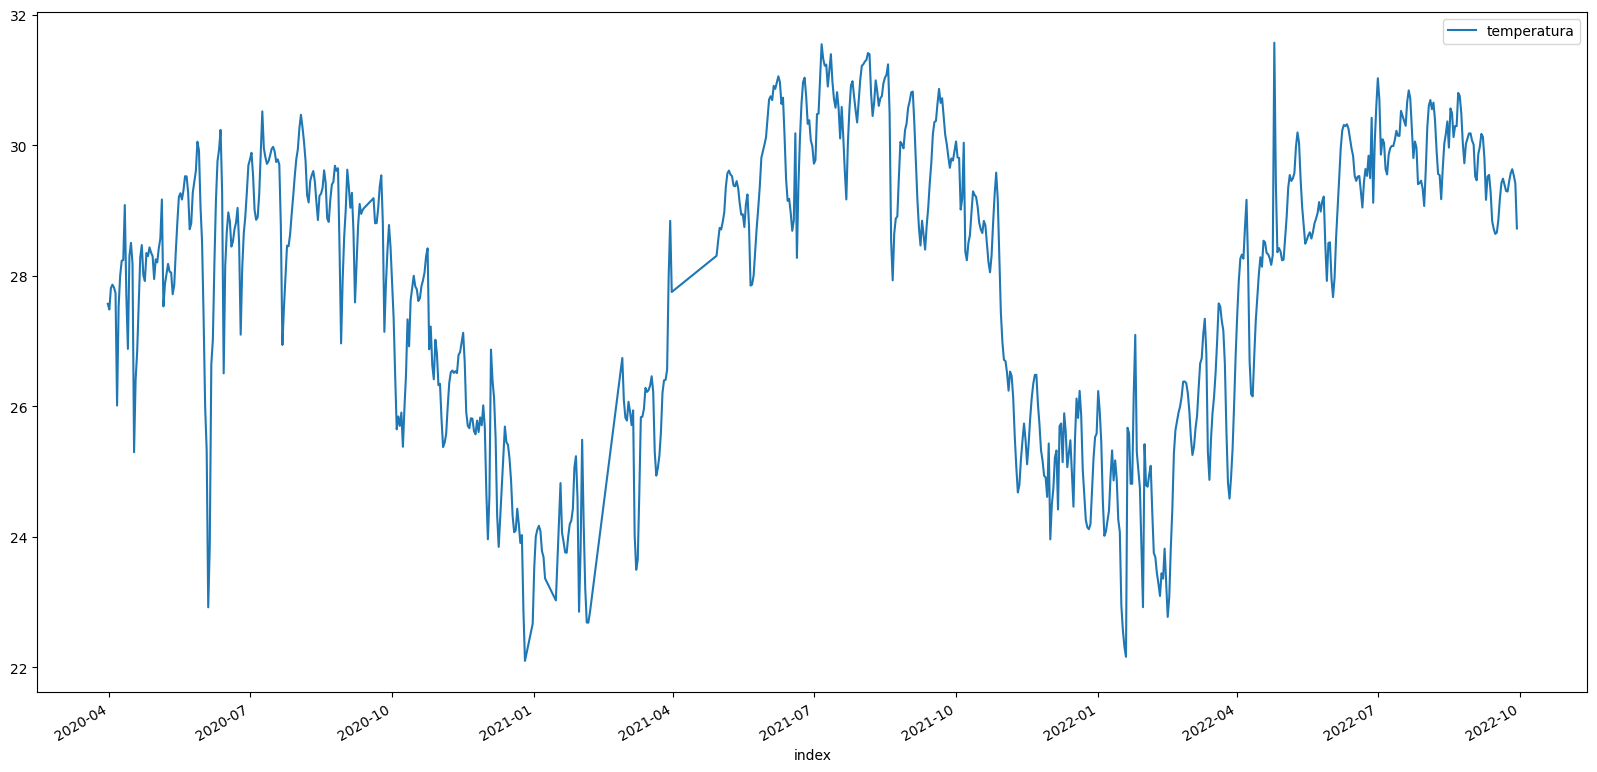

In [208]:
df_group.plot( x='index', y='temperatura', figsize=(20,10))
plt.show()

In [209]:
import seaborn as sns

<AxesSubplot: ylabel='temperatura'>

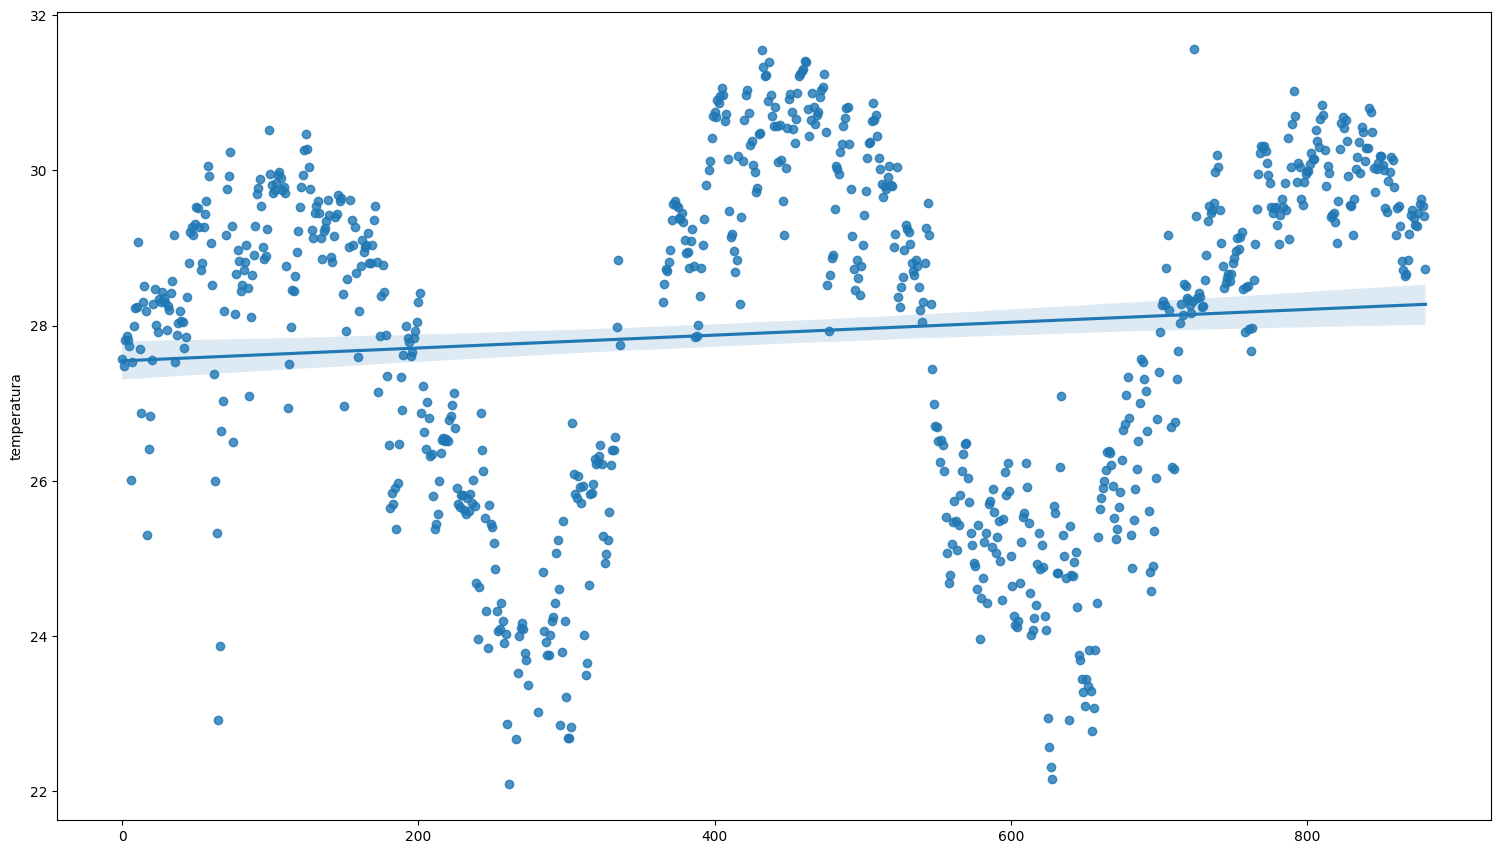

In [210]:

p = sns.regplot(data = df_group,  
                x = df_group.index, 
                y = df_group.temperatura
               ) 
p.figure.set_size_inches(18.5, 10.5)
p

In [211]:
#from scipy.signal import lfilter

In [212]:
df_group.head(10)

,index,temperatura
0,2020-03-31,27.568519
1,2020-04-01,27.482057
2,2020-04-02,27.811119
3,2020-04-03,27.862657
4,2020-04-04,27.817254
5,2020-04-05,27.734552
6,2020-04-06,26.010167
7,2020-04-07,27.528239
8,2020-04-08,27.998071
9,2020-04-09,28.228873


In [213]:
#for index, row in df_group.iterrows():
#    print(index, row['temperatura'])

dif=df_group['temperatura'].diff()

In [214]:
dif.head()

0         NaN
1   -0.086462
2    0.329062
3    0.051538
4   -0.045404
Name: temperatura, dtype: float64

In [215]:
df_group['dif']=dif

/tmp/ipykernel_49649/3326272685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['dif']=dif


In [216]:
df_group.head()

,index,temperatura,dif
0,2020-03-31,27.568519,NaN
1,2020-04-01,27.482057,-0.086462
2,2020-04-02,27.811119,0.329062
3,2020-04-03,27.862657,0.051538
4,2020-04-04,27.817254,-0.045404


<AxesSubplot: ylabel='dif'>

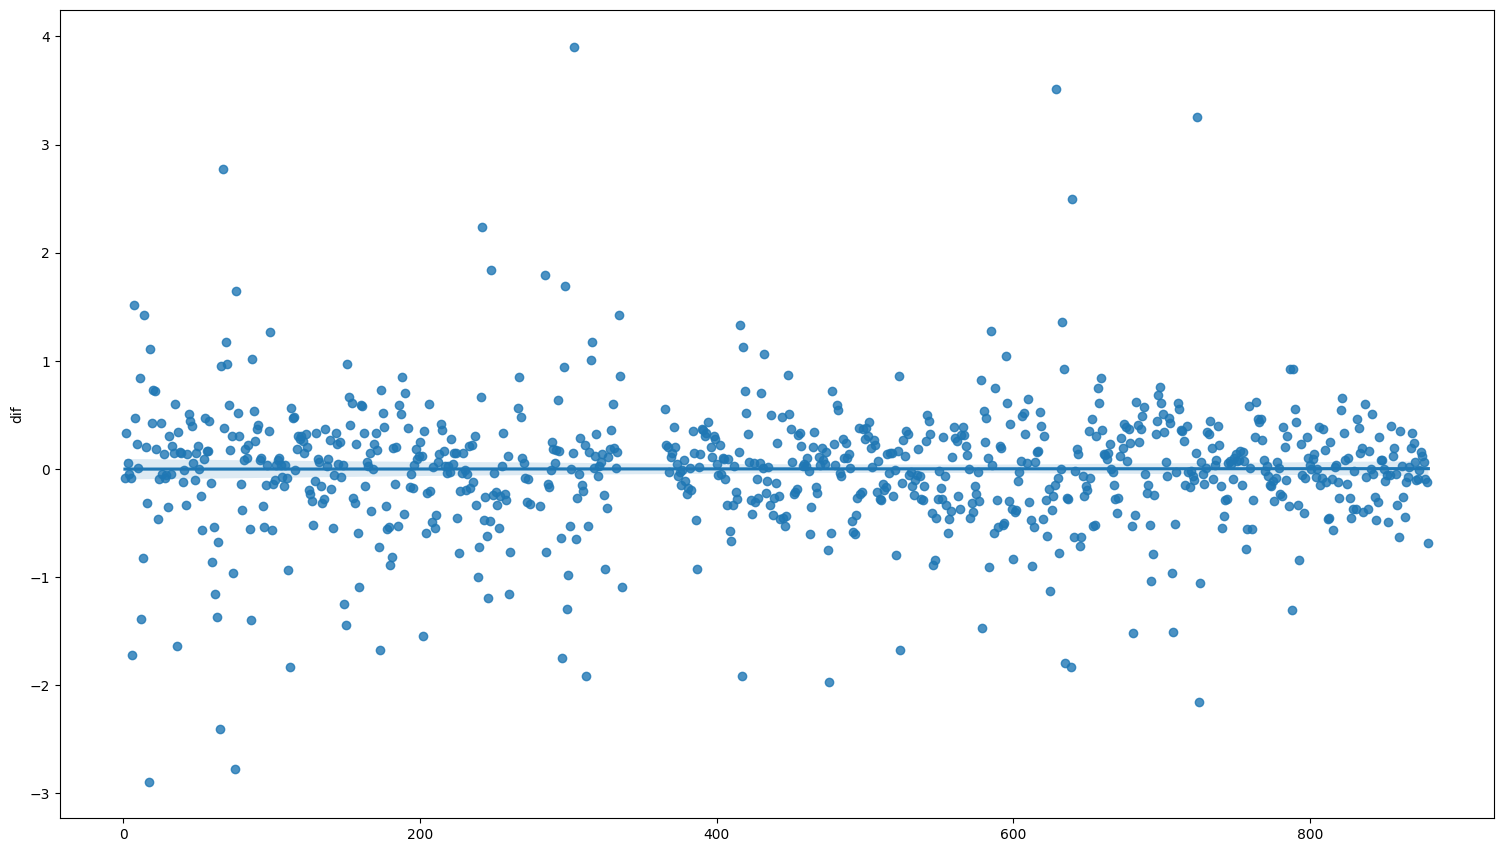

In [217]:
p = sns.regplot(data = df_group,  
                x = df_group.index, 
                y = df_group.dif
               ) 
p.figure.set_size_inches(18.5, 10.5)
p

In [218]:
df_group.shape

(838, 3)

In [219]:
df_group=df_group[df_group.dif<.1]
df_group=df_group[df_group.dif>-.1]

In [220]:
df_group.shape

(184, 3)

<AxesSubplot: ylabel='dif'>

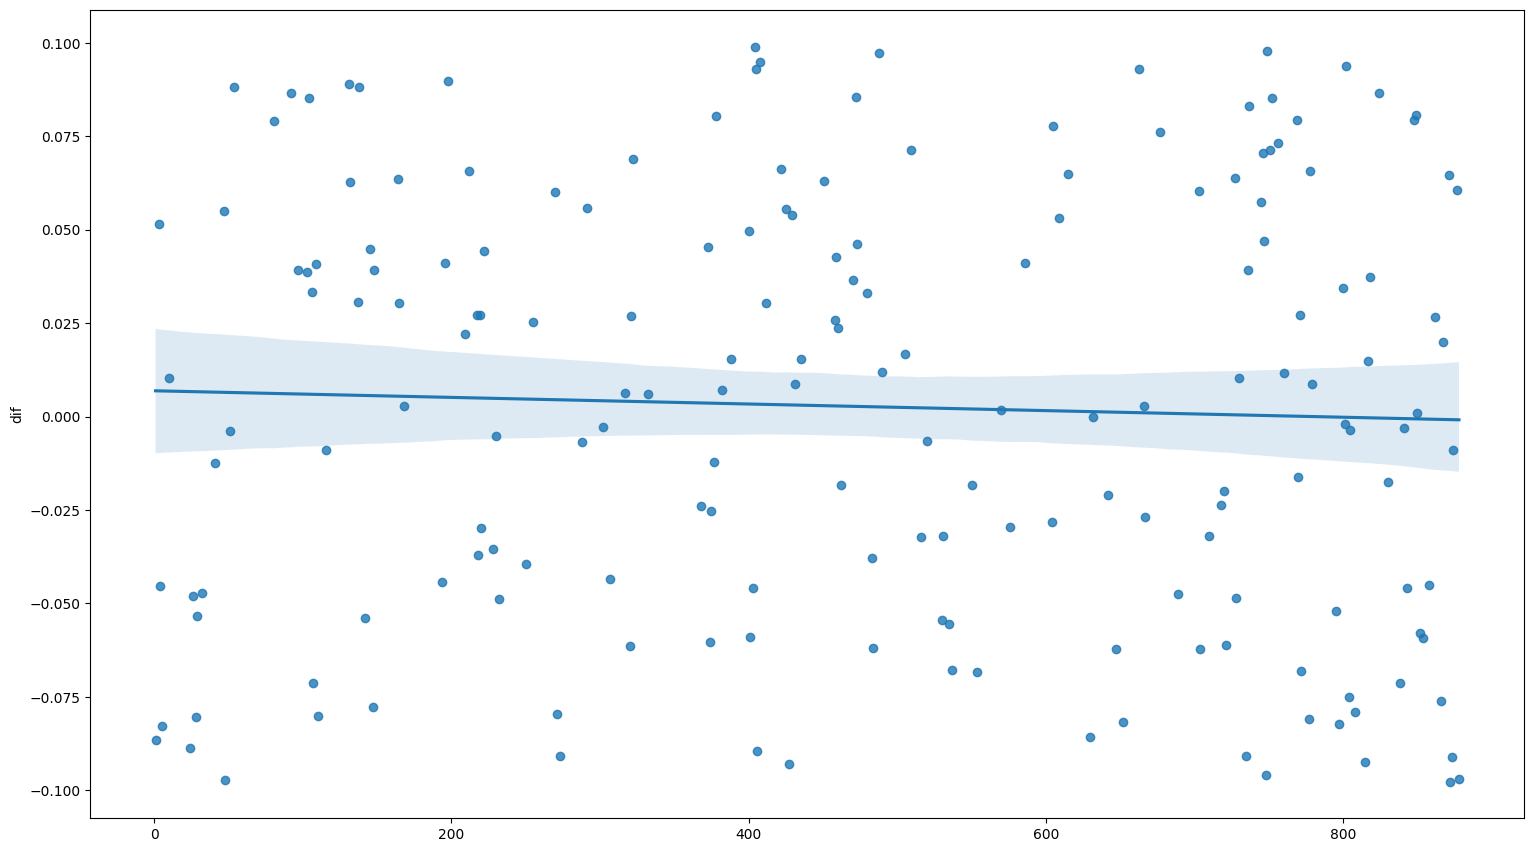

In [221]:
p = sns.regplot(data = df_group,  
                x = df_group.index, 
                y = df_group.dif
               ) 
p.figure.set_size_inches(18.5, 10.5)
p

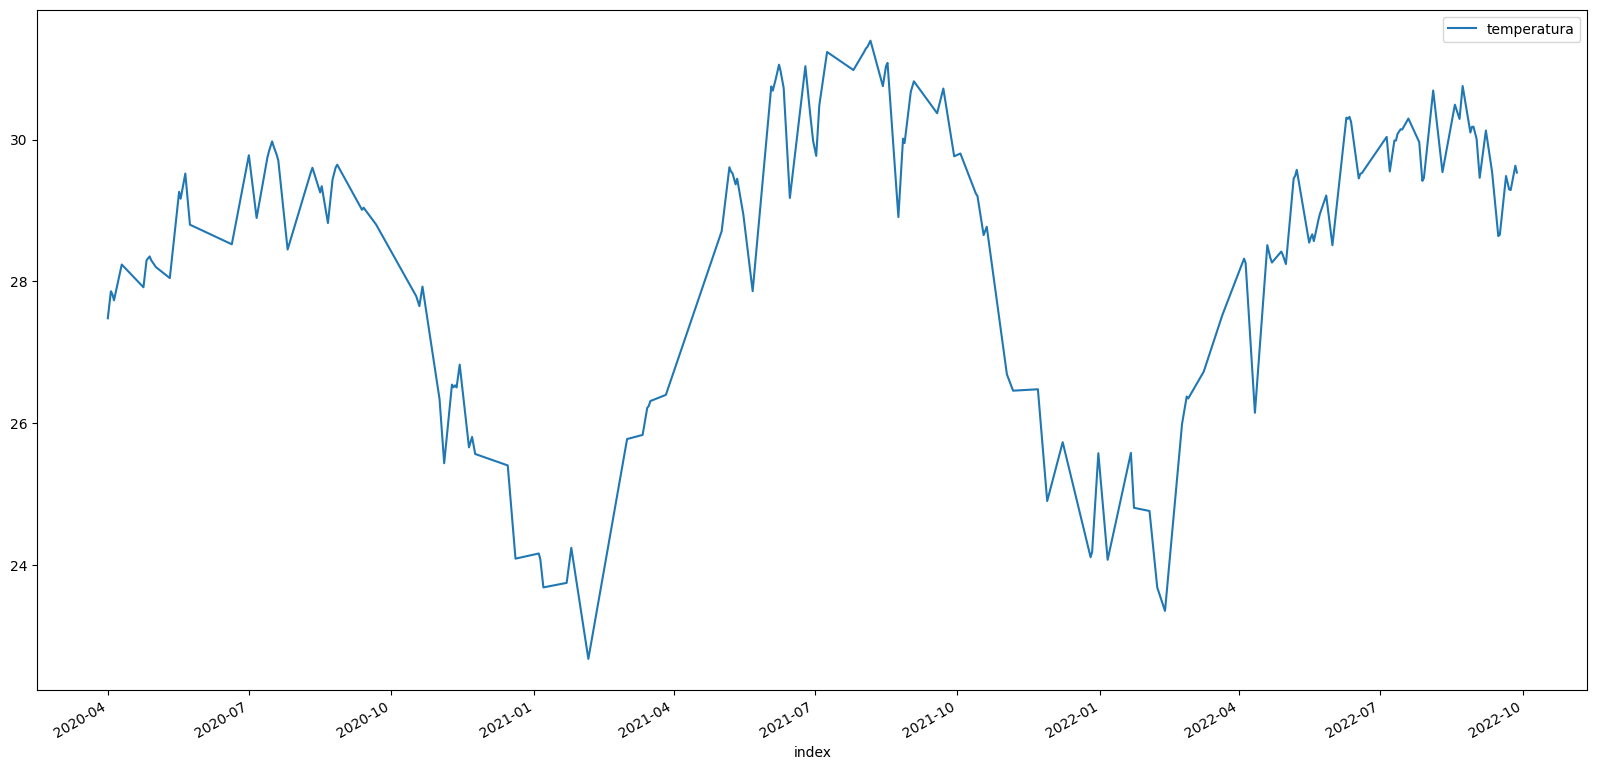

In [222]:
df_group.plot( x='index', y='temperatura', figsize=(20,10))
plt.show()

In [224]:
df_group.head(30)

,index,temperatura,dif
1,2020-04-01,27.482057,-0.086462
3,2020-04-03,27.862657,0.051538
4,2020-04-04,27.817254,-0.045404
5,2020-04-05,27.734552,-0.082701
10,2020-04-10,28.239196,0.010323
24,2020-04-24,27.918628,-0.088640
26,2020-04-26,28.298795,-0.048008
28,2020-04-28,28.353426,-0.080397
29,2020-04-29,28.300104,-0.053322
32,2020-05-02,28.203631,-0.047199
